## <b><i>Matemática para Ciência de Dados</i></b><br>
<b>Importação de Bibliotecas e Configurações para os Gráficos

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

custom_params = {
    "axes.facecolor": "#111",     # Cor de fundo dos gráficos
    "figure.facecolor": "#111",   # Cor de fundo da figura
    #"figure.edgecolor": "#111",   # Cor da borda da figura
    "text.color": "white",        # Cor do texto # plt.title
    "axes.labelcolor": "white",   # Cor dos rótulos dos eixos
    "xtick.color": "white",       # Cor dos ticks do eixo x
    "ytick.color": "white",       # Cor dos ticks do eixo y
    "axes.edgecolor": "white",    # Cor das bordas dos gráficos
    #"grid.color": "#444444",      # Cor da grade
    #"axes.titlecolor": "white",   # Cor do título
}

plt.rcParams["axes.spines.top"]= False
plt.rcParams["axes.spines.right"]= False
plt.style.use(custom_params)

<b>Função y = x²</b><br>
Avaliada nos inteiros entre -5 e 5

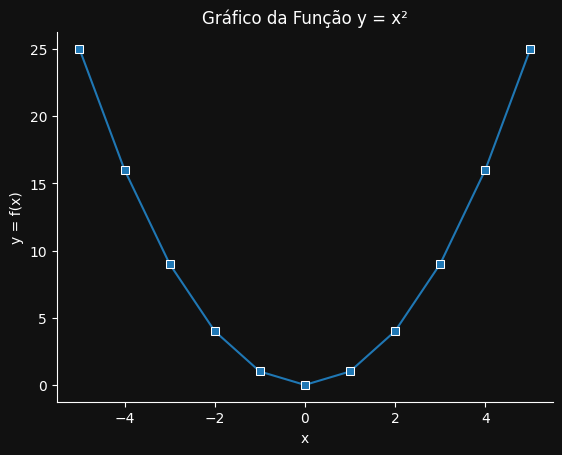

In [55]:
def f(x):
    y= x ** 2
    return y

x= np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]) # Vetor
y= f(x)

sns.lineplot(x=x, y=y, marker= 's')
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.title("Gráfico da Função y = x²")
plt.show()

<b>Função y = (x − θ)²</b><br>
Avaliada nos pontos:<br>
x = (−5, −4, −3, −2, −1, 0, 1, 2, 3, 4, 5)<br>
θ = (−2, 0, 2)

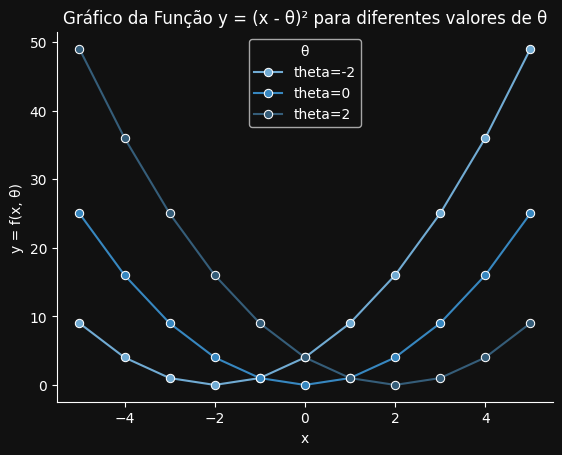

In [56]:
def fx(x, theta):
    out = (x[:, np.newaxis] - theta)**2
    return out

x = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
theta = np.array([-2, 0, 2])

results = fx(x, theta)

df = pd.DataFrame(results, columns=[f'theta={t}' for t in theta])
df['x'] = x

df_long = df.melt(id_vars='x', var_name='theta', value_name='y')

sns.lineplot(data=df_long, x='x', y='y', hue='theta', marker= 'o', palette="Blues_d")
plt.xlabel("x")
plt.ylabel("y = f(x, θ)")
plt.title("Gráfico da Função y = (x - θ)² para diferentes valores de θ")
plt.legend(title='θ')
plt.show()

<b>Matriz resultante da Função y = (x − θ)²</b>

In [58]:
df

,theta=-2,theta=0,theta=2,x
0,9,25,49,-5
1,4,16,36,-4
2,1,9,25,-3
3,0,4,16,-2
4,1,1,9,-1
5,4,0,4,0
6,9,1,1,1
7,16,4,0,2
8,25,9,1,3
9,36,16,4,4


<b>Função de dois parâmetros:</b><br> $\Large y = \frac{(x - \theta_1)^2}{\theta_2}$

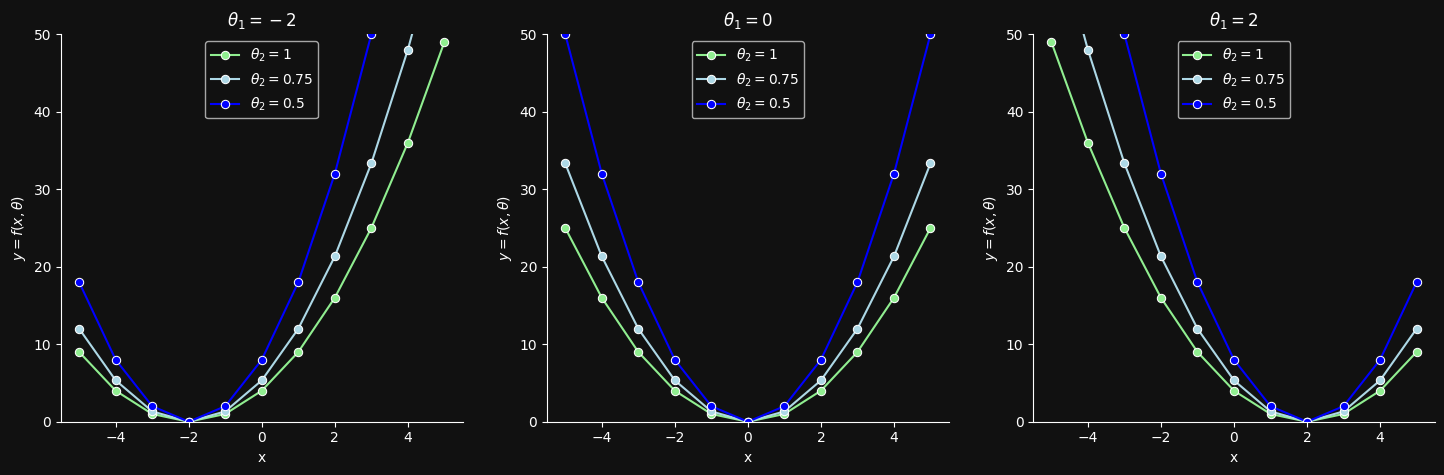

In [65]:
def fx(x, theta):
    return ((x - theta[0]) ** 2) / theta[1]

x = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])

# Configurando os valores de theta1
theta1 = [-2, 0, 2]

# Configurando os gráficos para ter 1 linha e 3 colunas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.tight_layout(pad=3)

# Expressões para o título de cada gráfico
titles = [r'$\theta_1 = -2$', r'$\theta_1 = 0$', r'$\theta_1 = 2$']

# Loop para criar cada gráfico
for i in range(3):
    ax = axes[i]  # Selecionando o subplot
    
    # Plotando para theta2 = 1 (linha amarela)
    y1 = fx(x, theta=[theta1[i], 1])
    sns.lineplot(x=x, y=y1, ax=ax, marker='o', label=r'$\theta_2 = 1$', color='lightgreen')
    
    # Plotando para theta2 = 0.75 (linha vermelha)
    y2 = fx(x, theta=[theta1[i], 0.75])
    sns.lineplot(x=x, y=y2, ax=ax, marker='o', label=r'$\theta_2 = 0.75$', color='lightblue')
    
    # Plotando para theta2 = 0.5 (linha azul)
    y3 = fx(x, theta=[theta1[i], 0.5])
    sns.lineplot(x=x, y=y3, ax=ax, marker='o', label=r'$\theta_2 = 0.5$', color='blue')

    # Configurações de cada gráfico
    ax.set_ylim(0, 50)
    ax.set_xlabel("x")
    ax.set_ylabel(r'$y = f(x, \theta)$')
    ax.set_title(titles[i])
    ax.legend(loc='upper center')

plt.show()